In [19]:
%pwd

'/Users/amrtamer/Documents'

In [14]:
%cd ../../Users/amrtamer/Documents/Internship

[Errno 2] No such file or directory: '../../Users/amrtamer/Documents/Internship'
/Users/amrtamer/Documents


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [18]:
# Load the Volve production data (replace with your actual file path)
file_path = "data/Production_data/VOLVE/Volve production data.xlsx"
df = pd.read_excel(file_path)

FileNotFoundError: [Errno 2] No such file or directory: 'data/Production_data/VOLVE/Volve production data.xlsx'

In [12]:
df['DATEPRD'] = pd.to_datetime(df['DATEPRD'])

# Explore the first few rows of the dataset
df.head()

,DATEPRD,WELL_BORE_CODE,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,2014-04-07,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,0.00000,0.00000,0.00000,0.0,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,2014-04-08,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,1.003059,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2014-04-09,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.979008,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,2014-04-10,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,NaN,NaN,NaN,0.0,0.545759,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,2014-04-11,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,0.0,310.37614,96.87589,277.27826,0.0,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


In [17]:
df.NPD_WELL_BORE_CODE.nunique()

7

In [44]:
# separate production from injection
df_producers = df[df["WELL_TYPE"]=="OP"]

df_producers.rename(columns={
    'DATEPRD': 'date',
    'NPD_WELL_BORE_CODE': 'well_name',
    'ON_STREAM_HRS': 'prod_hrs',
    'AVG_DOWNHOLE_PRESSURE': 'bhp',
    'AVG_DOWNHOLE_TEMPERATURE': 'bht',
    'AVG_DP_TUBING': 'dp_tubing',
    'AVG_WHP_P': 'tht',
    'AVG_WHT_P': 'thp',
    'DP_CHOKE_SIZE': 'choke_size_percentage',
    'BORE_OIL_VOL': 'oil_vol',
    'BORE_GAS_VOL': 'gas_vol',
    'BORE_WAT_VOL': 'water_vol',    
}, inplace=True)

df_producers.loc[df_producers["prod_hrs"]==0, "oil_vol"] = 0

df_producers["oil_rate"] = (df_producers["oil_vol"] * 24 )  / df_producers["prod_hrs"]

df_producers_activep = df_producers[df_producers.oil_rate>0]

df_producers_activep.head()

,date,WELL_BORE_CODE,well_name,NPD_WELL_BORE_NAME,NPD_FIELD_CODE,NPD_FIELD_NAME,NPD_FACILITY_CODE,NPD_FACILITY_NAME,prod_hrs,bhp,bht,dp_tubing,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,tht,thp,choke_size_percentage,oil_vol,gas_vol,water_vol,BORE_WI_VOL,FLOW_KIND,WELL_TYPE,oil_rate
15,2014-04-22,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,289.421362,106.353209,182.059312,0.0,43.343451,%,107.362050,37.939251,78.935409,631.47,90439.09,0.0,NaN,production,OP,631.47
16,2014-04-23,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,270.239793,107.643779,171.052782,NaN,47.167523,%,99.187011,60.756579,70.627109,1166.46,165720.39,0.0,NaN,production,OP,1166.46
17,2014-04-24,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,262.842747,107.869234,168.241977,NaN,47.732310,%,94.600770,63.046800,66.049151,1549.81,221707.31,0.0,NaN,production,OP,1549.81
18,2014-04-25,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,255.526995,107.971137,165.538903,NaN,48.533769,%,89.988092,64.547229,61.405386,1248.70,178063.52,0.0,NaN,production,OP,1248.70
19,2014-04-26,NO 15/9-F-1 C,7405,15/9-F-1 C,3420717,VOLVE,369304,MÆRSK INSPIRER,24.0,247.199052,108.052030,162.422242,NaN,49.844502,%,84.776810,65.723694,56.147906,1345.78,192602.19,0.0,NaN,production,OP,1345.78


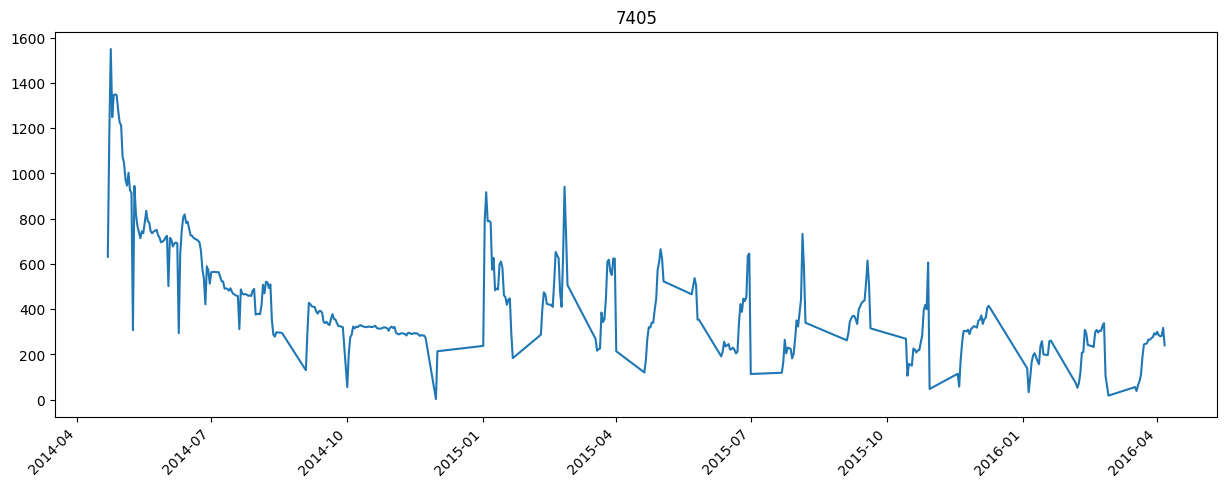

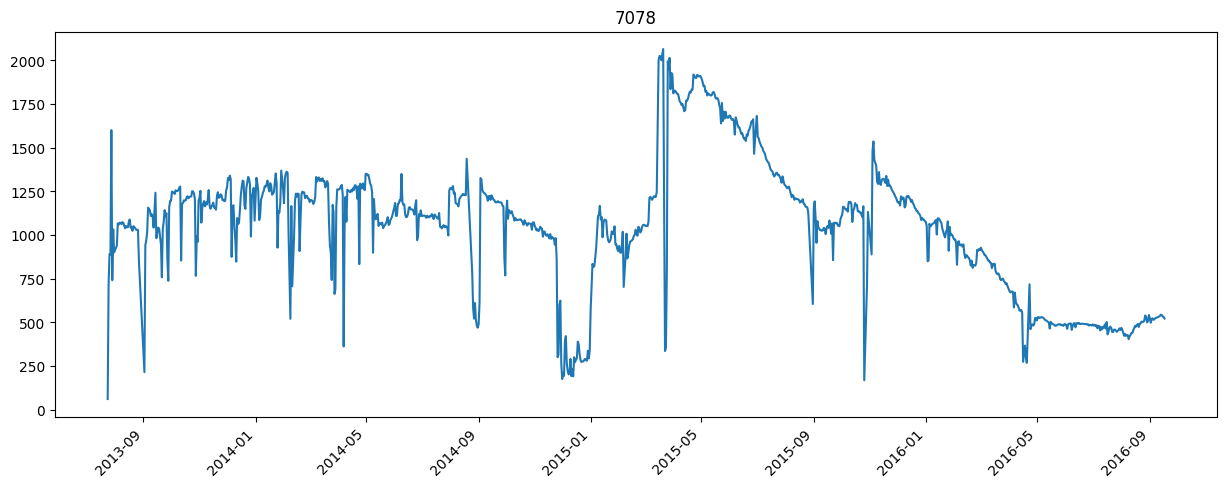

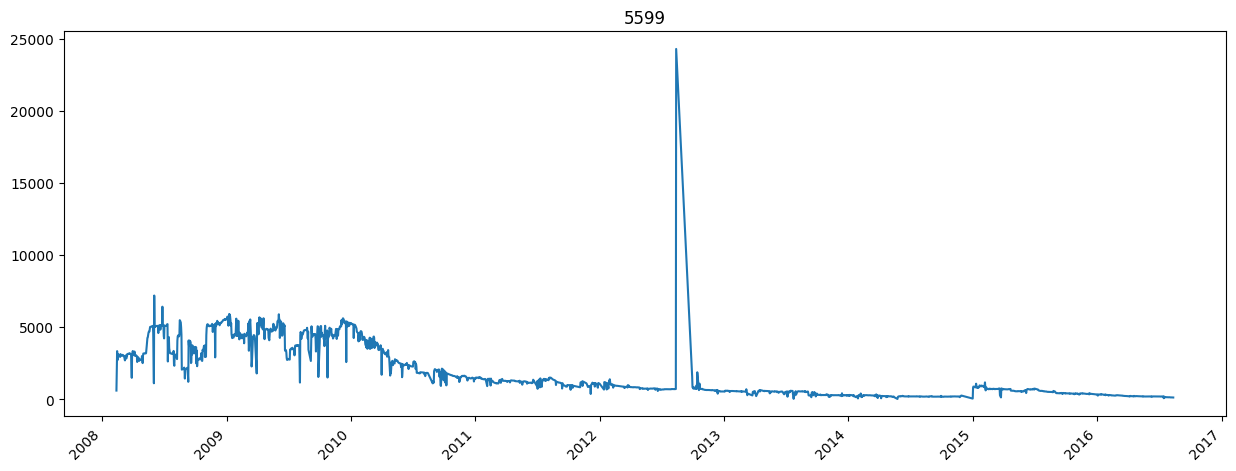

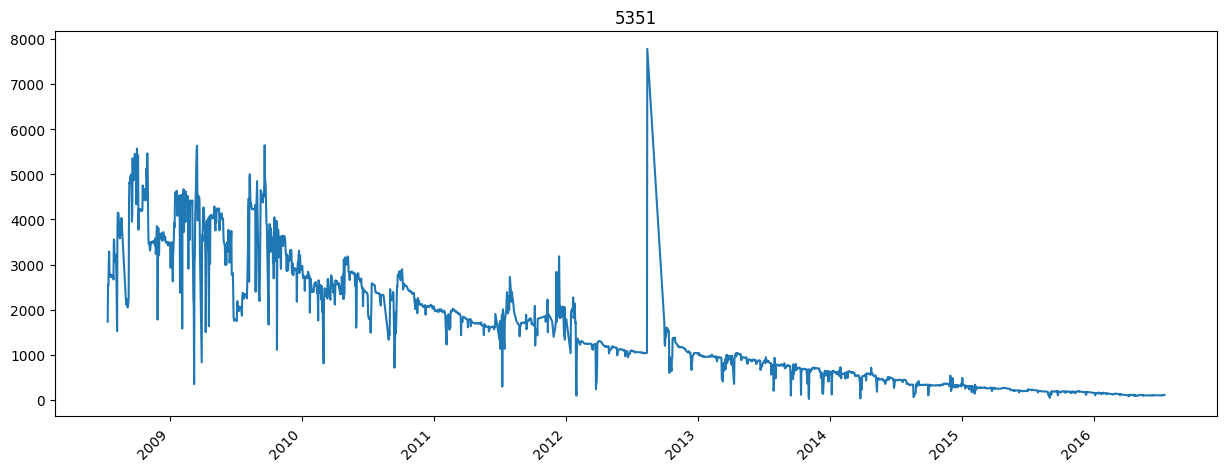

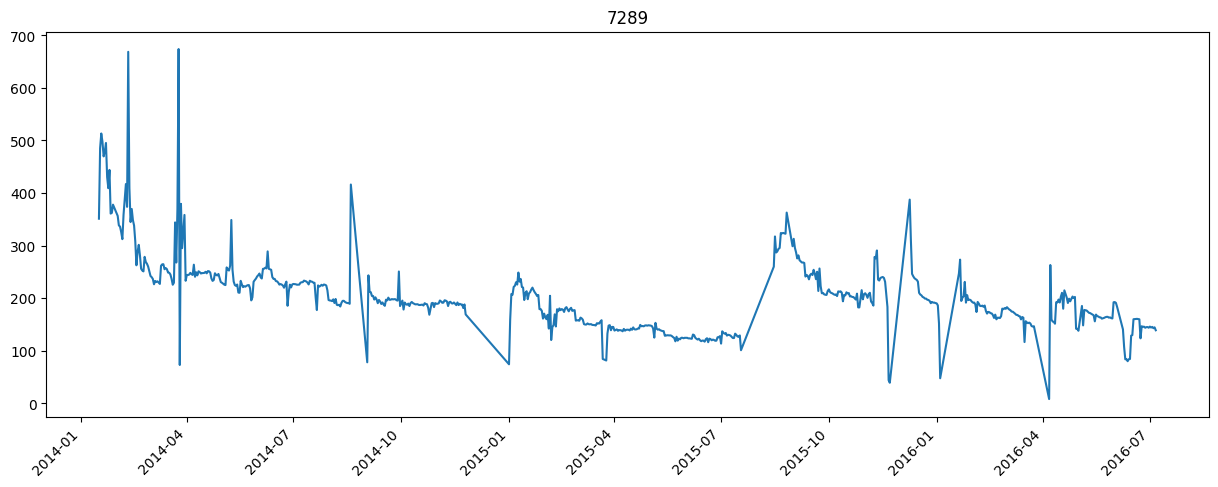

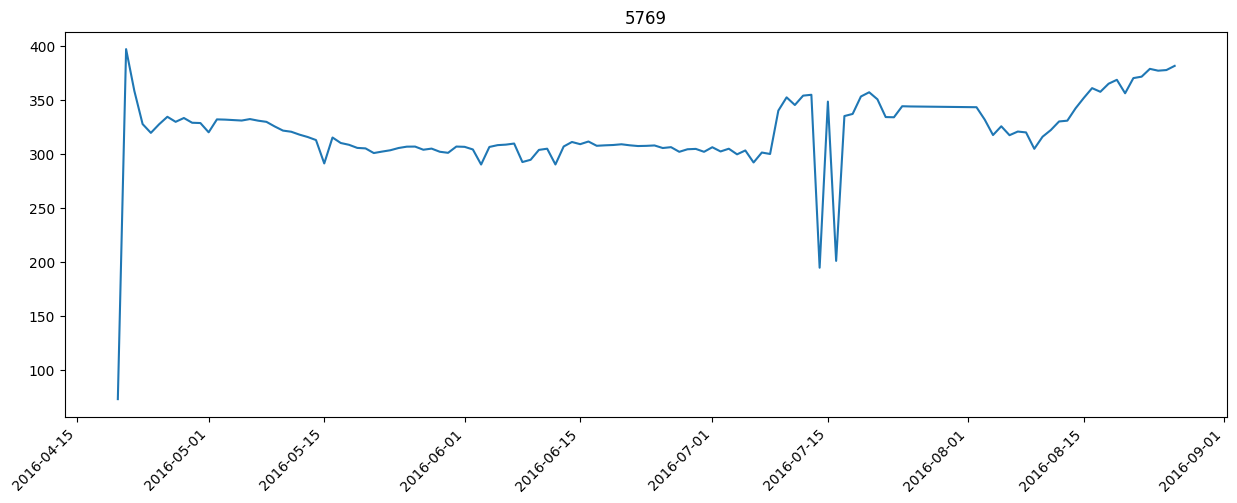

In [45]:
for i in df_producers_activep.well_name.unique():
    plt.figure(figsize=(15,5))
    plt.title(i)
    plt.plot(df_producers_activep[df_producers_activep.well_name==i].set_index('date').oil_rate)
    plt.xticks(rotation=45, ha='right')
    plt.show()

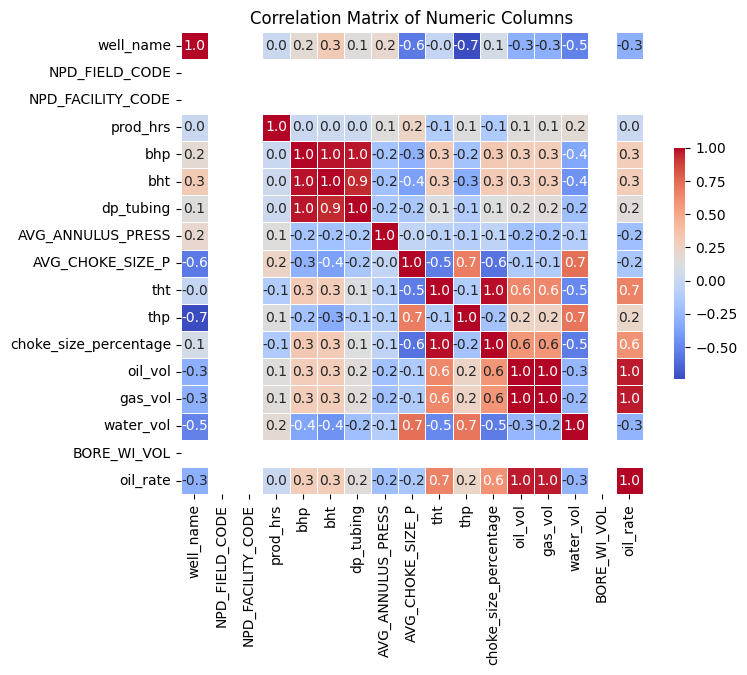

In [46]:
# Select only numeric columns from the DataFrame
numeric_df = df_producers_activep.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

In [47]:
correlation_matrix['oil_rate']

well_name               -0.305305
NPD_FIELD_CODE                NaN
NPD_FACILITY_CODE             NaN
prod_hrs                 0.006858
bhp                      0.291657
bht                      0.287870
dp_tubing                0.153027
AVG_ANNULUS_PRESS       -0.211984
AVG_CHOKE_SIZE_P        -0.154089
tht                      0.654040
thp                      0.222366
choke_size_percentage    0.598886
oil_vol                  0.965395
gas_vol                  0.962258
water_vol               -0.280264
BORE_WI_VOL                   NaN
oil_rate                 1.000000
Name: oil_rate, dtype: float64

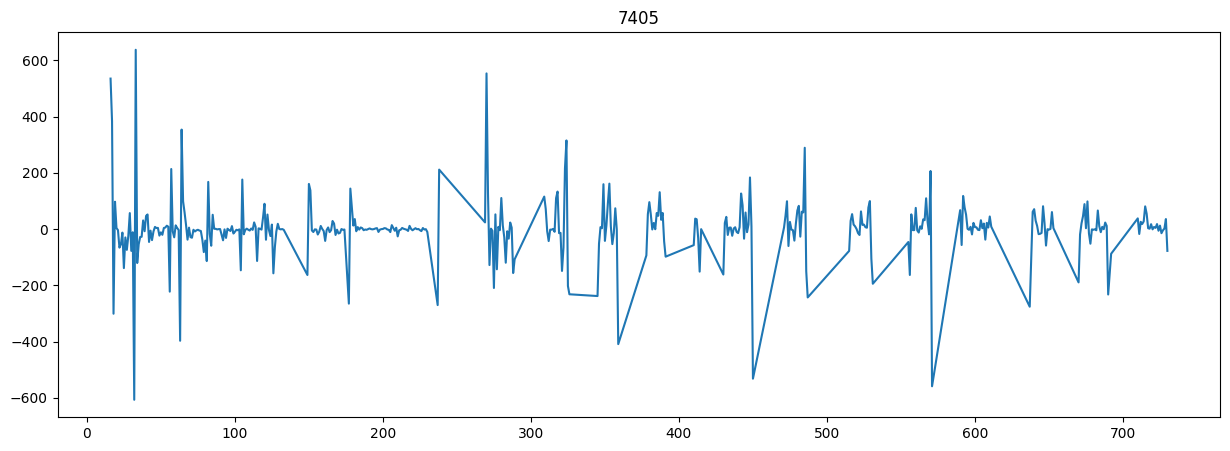

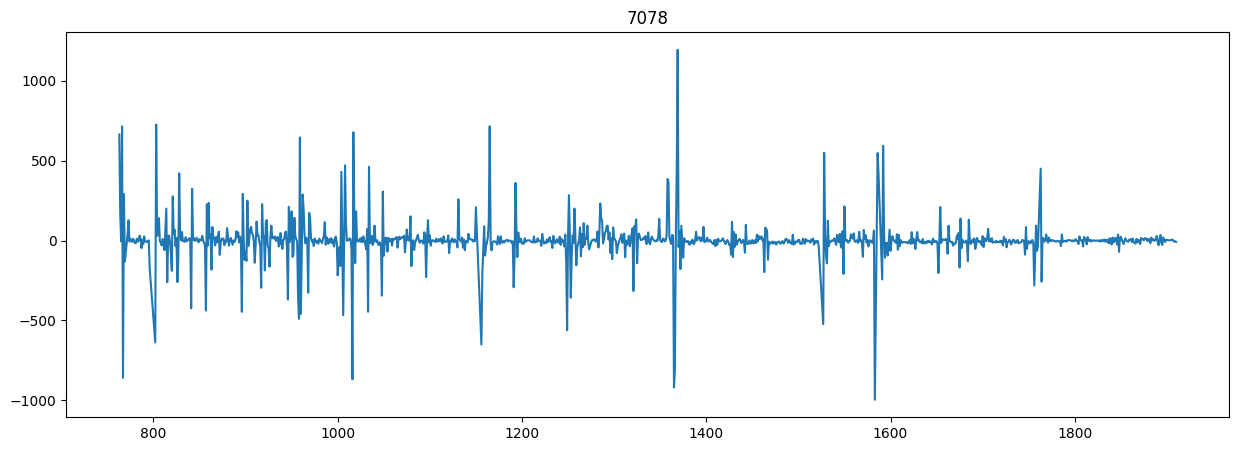

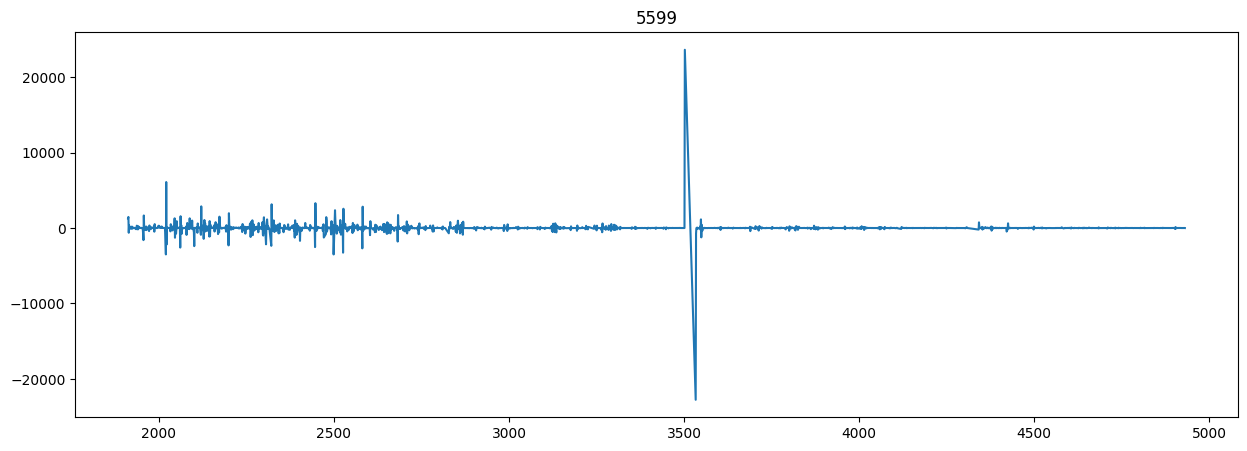

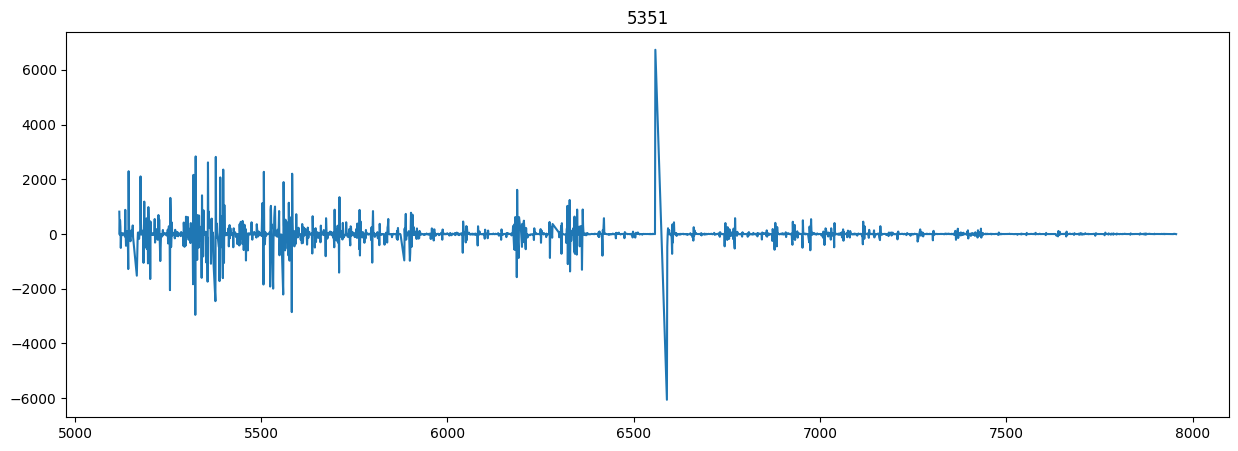

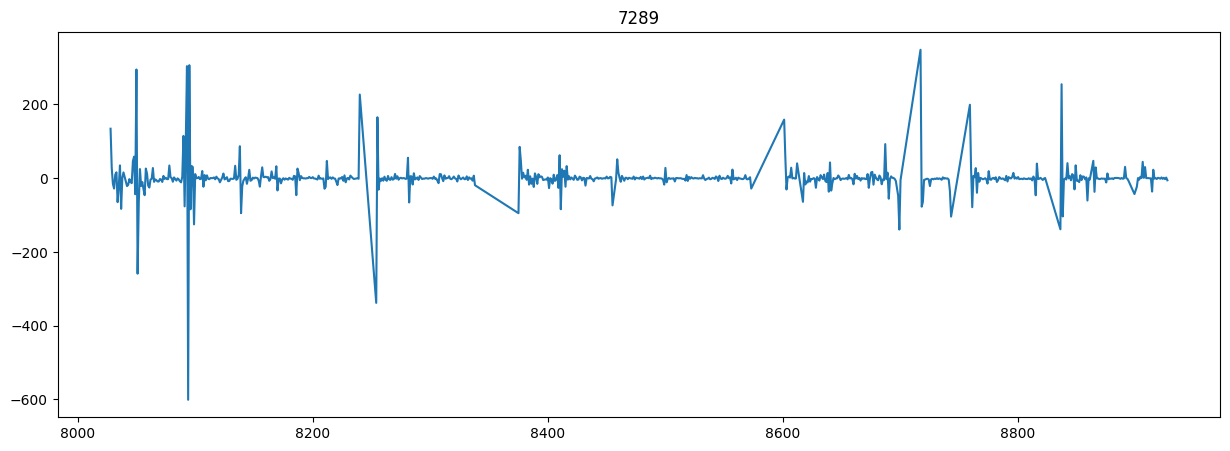

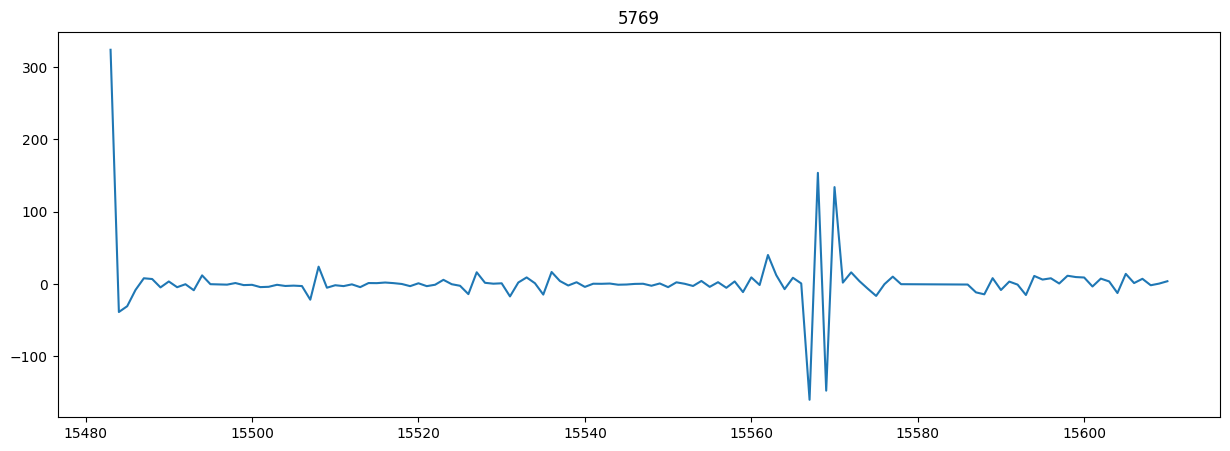

In [48]:
# Remove outliers 

for i in df_producers_activep.well_name.unique():
    plt.figure(figsize=(15,5))
    plt.title(i)
    plt.plot(df_producers_activep[(df_producers_activep.well_name==i)]['oil_rate'].diff())
    plt.show()

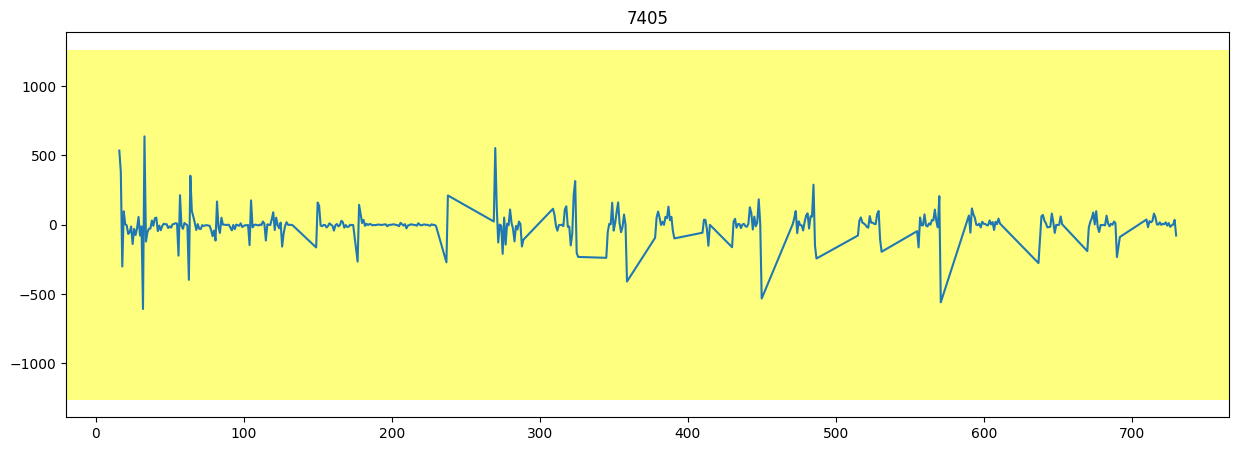

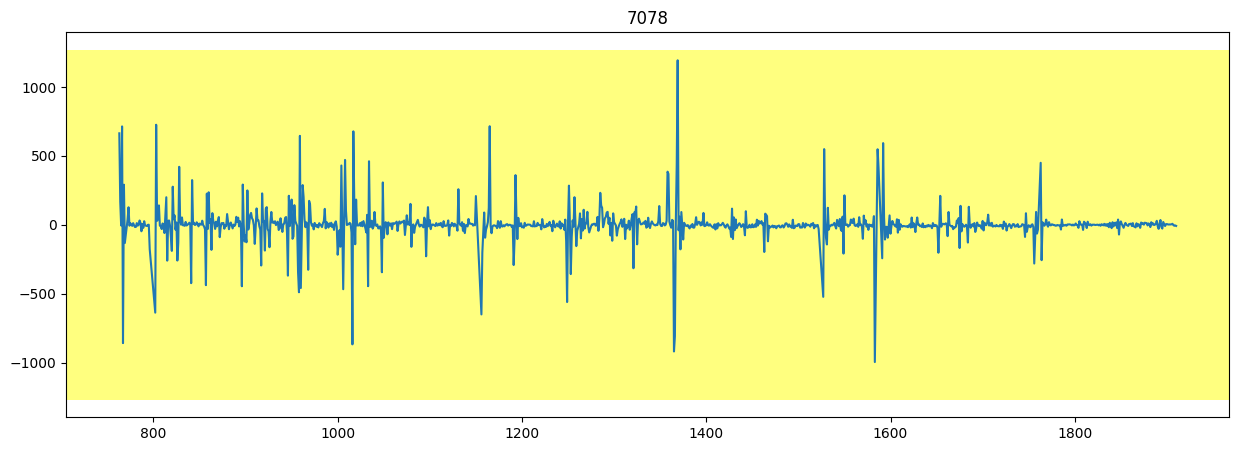

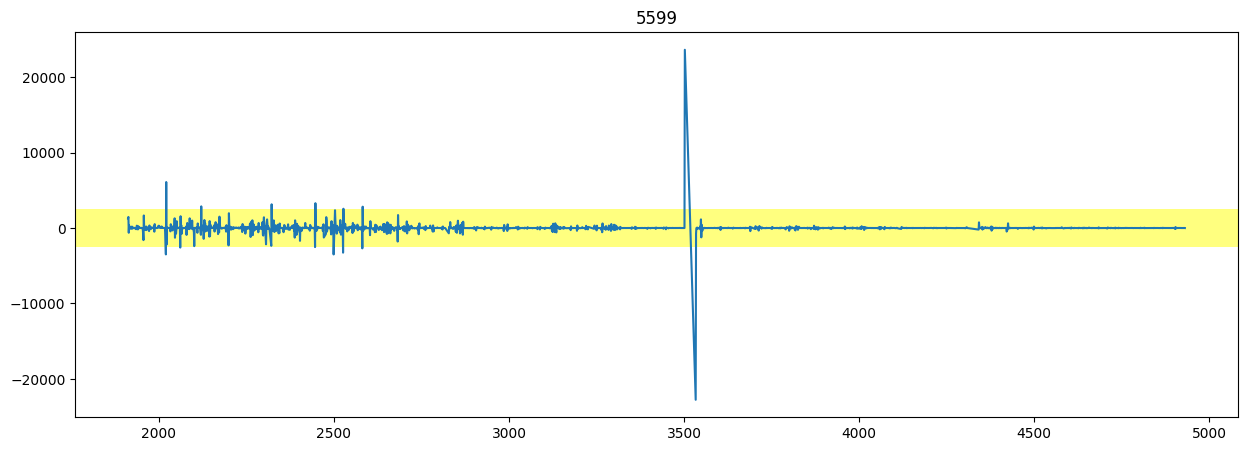

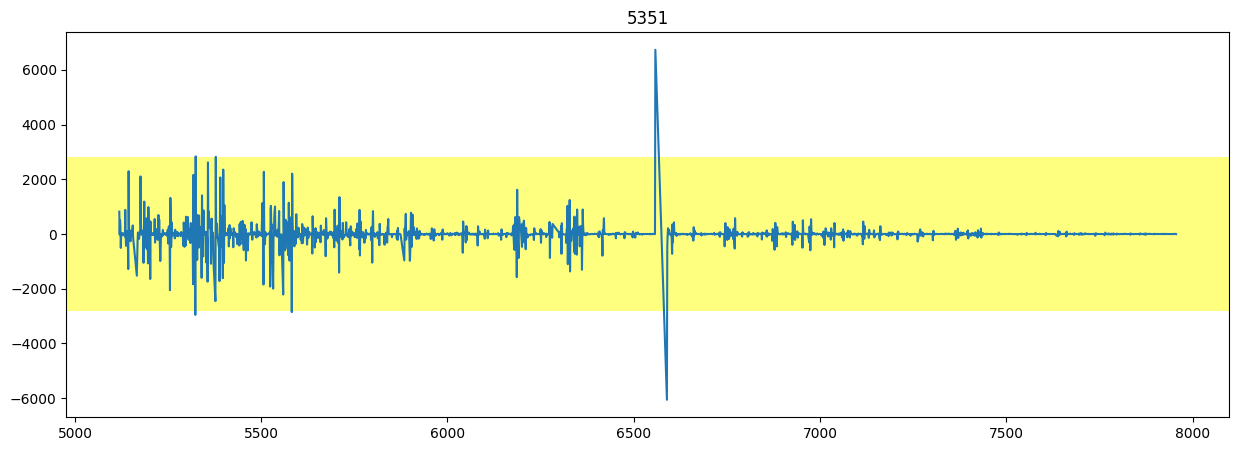

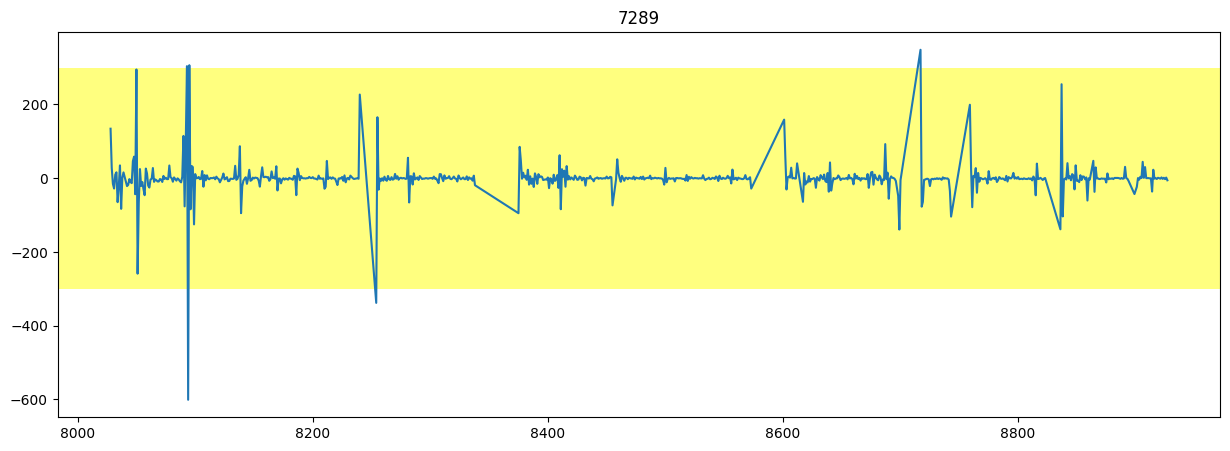

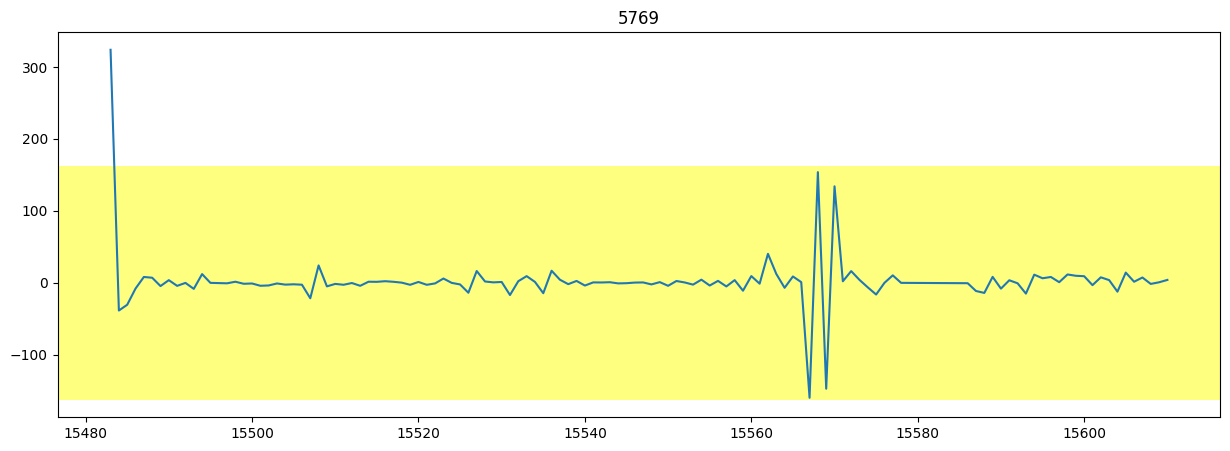

In [62]:
# Remove outliers 
n = 10

for i in df_producers_activep.well_name.unique():
    diff_val = df_producers_activep[(df_producers_activep.well_name==i)]['oil_rate'].diff()
    mean_diff = diff_val.mean()
    upper_val = n*np.nanpercentile(diff_val, 95)
    lower_val = -n*np.nanpercentile(diff_val, 95)
    plt.figure(figsize=(15,5))
    plt.title(i)
    plt.plot(diff_val)
    plt.axhspan(lower_val, upper_val, facecolor='yellow', alpha=0.5)
    plt.show()

In [72]:
list_df_noout = []
n=10

for i in df_producers_activep.well_name.unique():
    df_f = df_producers_activep[(df_producers_activep.well_name==i)]
    df_f['diff_target'] = df_f['oil_rate'].diff()[1:] + [0]
    mean_diff = df_f['diff_target'].mean()
    upper_val = n*np.nanpercentile(diff_val, 95)
    lower_val = -n*np.nanpercentile(diff_val, 95)
    df_f['out'] = np.where((df_f['diff_target']>upper_val) | (df_f['diff_target']<lower_val),1,0)
    list_df_noout.append(df_f)
    
df_noout = pd.concat(list_df_noout)
df_noout['oil_rate_noout'] = np.where(df_noout.out==1,0,df_noout.oil_rate)

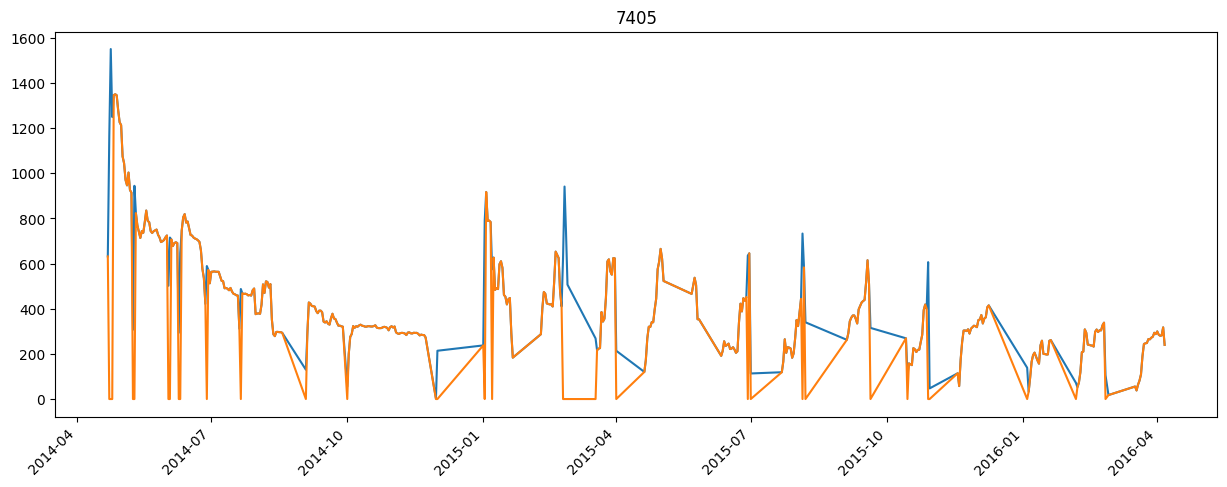

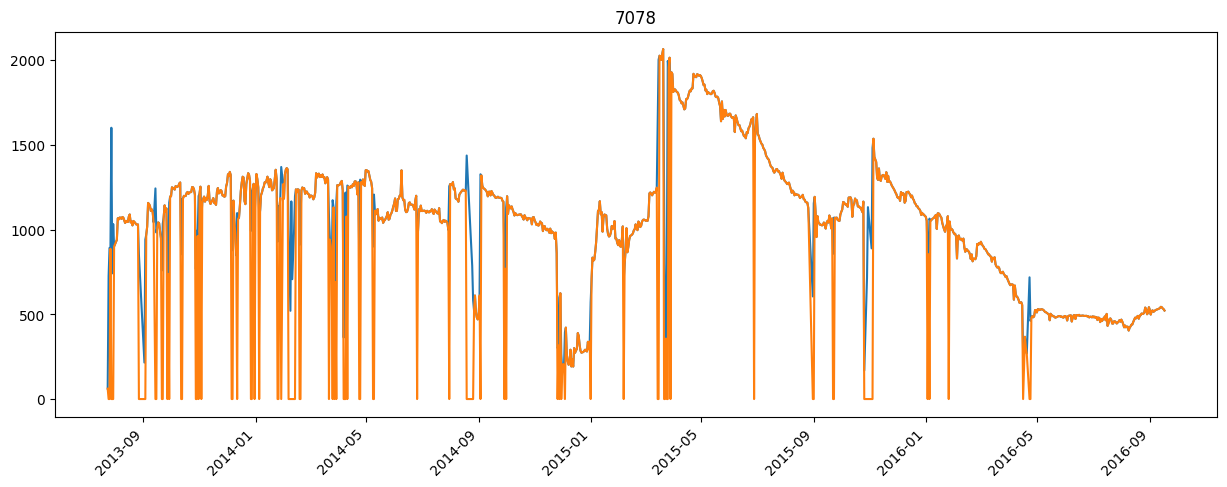

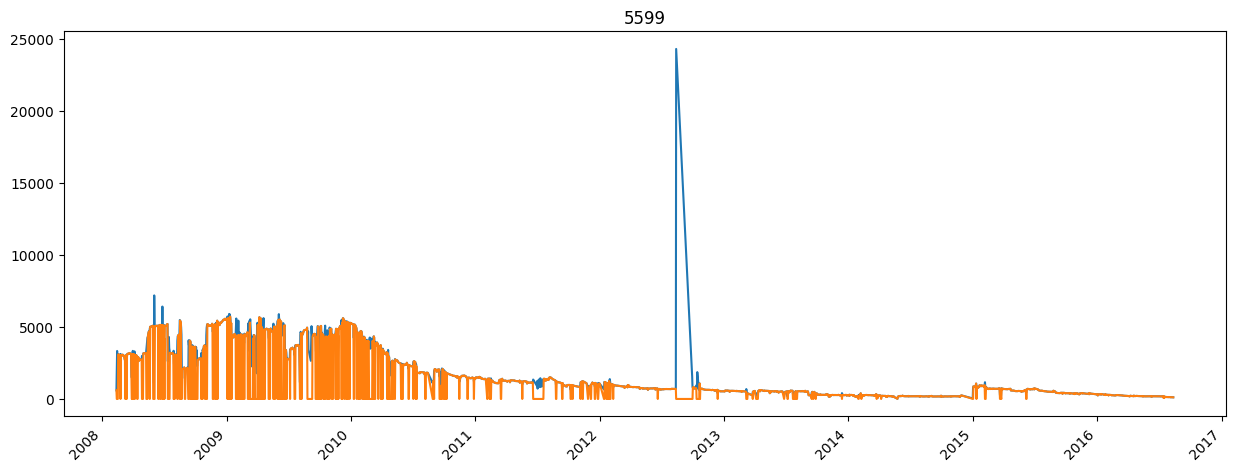

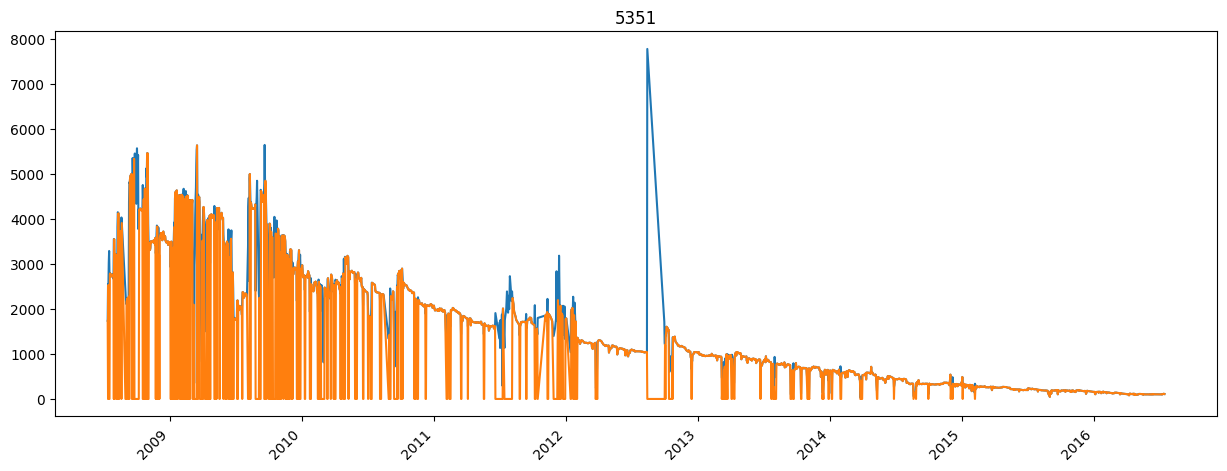

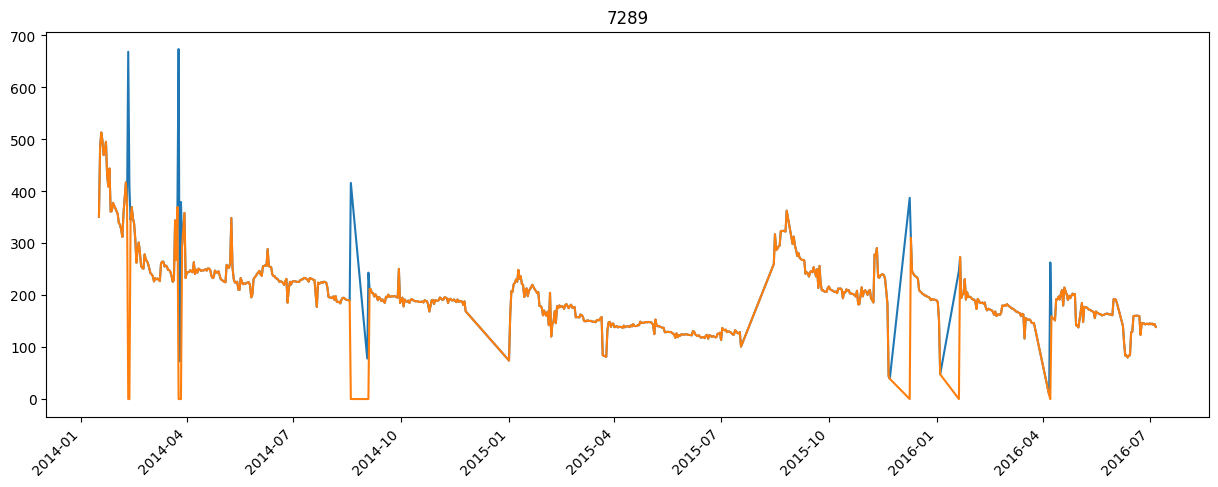

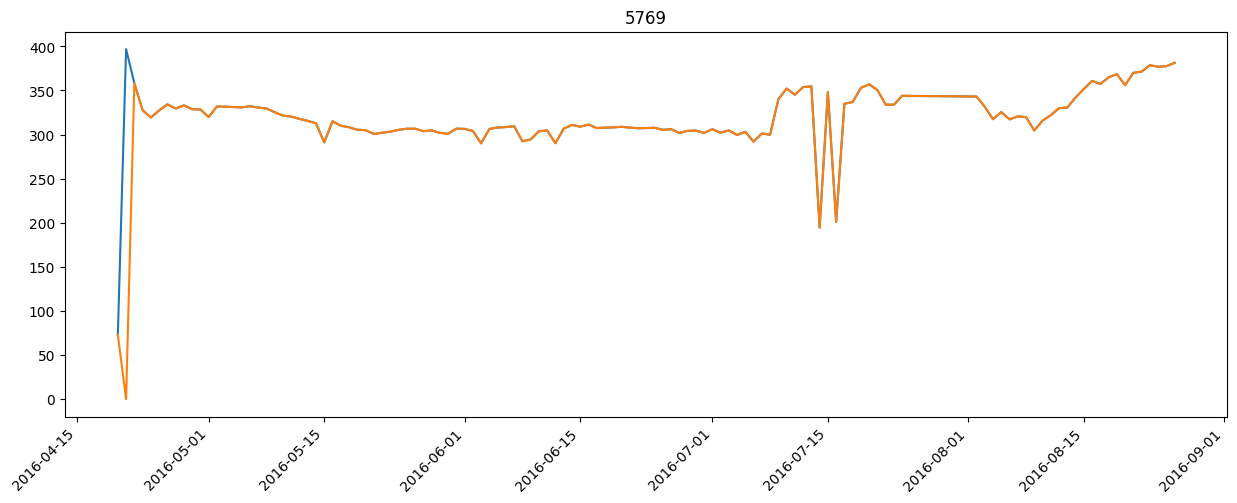

In [73]:
for i in df_noout.well_name.unique():
    plt.figure(figsize=(15,5))
    plt.title(i)
    plt.plot(df_noout[df_noout.well_name==i].set_index('date').oil_rate)
    plt.plot(df_noout[df_noout.well_name==i].set_index('date').oil_rate_noout)
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [79]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Generating synthetic time-series data
def generate_data(size=1000, sequence_length=10):
    data = np.sin(np.linspace(0, 10 * np.pi, size))  # Sine wave data
    sequences = [data[i:i+sequence_length] for i in range(size-sequence_length)]
    next_points = data[sequence_length:]
    return np.array(sequences), next_points

# Custom dataset class
class TimeSeriesDataset(Dataset):
    def __init__(self, sequences, next_points):
        self.sequences = sequences
        self.next_points = next_points

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        return self.sequences[idx], self.next_points[idx]
    
    
# Transformer Model (simplified for numerical data)
class TransformerModel(nn.Module):
    def __init__(self, input_size=1, sequence_length=10, num_layers=1, \
                 num_heads=2, dim_feedforward=512):
        super(TransformerModel, self).__init__()
        self.sequence_length = sequence_length
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=input_size*sequence_length,
                           nhead=num_heads,
                           dim_feedforward=dim_feedforward)
        self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer,
                      num_layers=num_layers)
        self.fc_out = nn.Linear(input_size * sequence_length, 1)

    def forward(self, src):
        # Reshape to match the input dimensions
        src = src.reshape(-1, self.sequence_length, 1)  
        src = src.flatten(start_dim=1)
        src = src.unsqueeze(0)  # Add batch dimension
        out = self.transformer_encoder(src)
        out = out.squeeze(0)  # Remove batch dimension
        return self.fc_out(out)

In [80]:
# Prepare data
sequences, next_points = generate_data()
dataset = TimeSeriesDataset(sequences, next_points)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [87]:
# Model
model = TransformerModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(9):  # Number of epochs
    for seq, next_point in dataloader:
        seq, next_point = seq.float(), next_point.float().unsqueeze(1)
        output = model(seq)
        loss = criterion(output, next_point)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

Epoch 1, Loss: 0.08333785831928253
Epoch 2, Loss: 0.07789430767297745
Epoch 3, Loss: 0.0606481097638607
Epoch 4, Loss: 0.03845982998609543
Epoch 5, Loss: 0.03339458256959915
Epoch 6, Loss: 0.0370602086186409
Epoch 7, Loss: 0.007082691416144371
Epoch 8, Loss: 0.012460724450647831
Epoch 9, Loss: 0.013305124826729298


In [88]:
# Predict the next point after a sequence
test_seq = torch.tensor(sequences[0]).float()
predicted_point = model(test_seq)
print("Predicted next point:", predicted_point.item())

Predicted next point: 0.35017645359039307


In [89]:
from nixtlats import TimeGPT


ModuleNotFoundError: No module named 'nixtlats'